In this document, I will ananlyse feature contribution matrix and survey data using heat map and cosine similarity

In [24]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *
from code.fc_cluster import *
from code.fc import *
from code.clusterEDA import *

from sklearn.preprocessing import scale

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Feature contribution matrix

In [17]:
fc = FeatureContribution('data/fc_df2.pkl')
fc_df = fc.cluster_processor(3,6)

In [3]:
# groupby cluster, then take means
summary = fc_df.groupby('cluster')[fc.features].agg(np.mean)

#Normalize by columns
summary = pd.DataFrame(scale(summary),columns=fc.features)

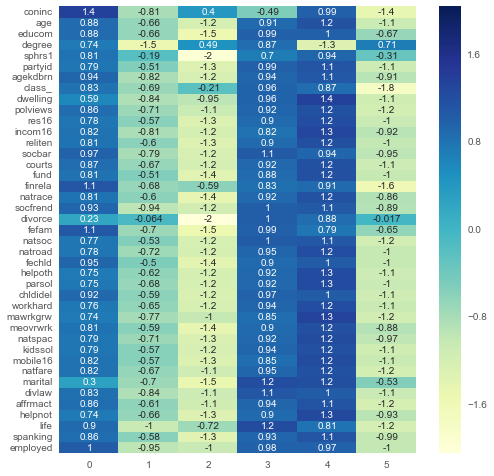

In [12]:
# heat map
plt.figure(figsize=(8,8))
sns.heatmap(summary.T,cmap="YlGnBu",annot=True)

In [5]:
# Check cosine similarity
cos_dict = df_cosine_dist(summary.T)
cos_dict

OrderedDict([((0, 3), 0.08),
             ((0, 4), 0.09),
             ((3, 4), 0.09),
             ((1, 5), 0.13),
             ((2, 5), 0.16),
             ((1, 2), 0.2),
             ((1, 4), 1.83),
             ((0, 2), 1.87),
             ((3, 5), 1.88),
             ((1, 3), 1.92),
             ((2, 4), 1.94),
             ((0, 5), 1.94),
             ((2, 3), 1.94),
             ((0, 1), 1.95),
             ((4, 5), 1.96)])

#### First 6 pairs are from same employed groups, because they have gone through same decision tree path which is consistant with random forest results. 

### However, the ranking of cosine similarity across employed groups, gives us some insight on how similar between blusters and which features result in different employment status.

In [6]:
# anking of cosine similarity across employed groups
list(cos_dict.iteritems())[6:]

[((1, 4), 1.83),
 ((0, 2), 1.87),
 ((3, 5), 1.88),
 ((1, 3), 1.92),
 ((2, 4), 1.94),
 ((0, 5), 1.94),
 ((2, 3), 1.94),
 ((0, 1), 1.95),
 ((4, 5), 1.96)]

According to the paired cosine similarity result. Unemployed cluster 1 and employed cluster 4 are most similar across employed groups. Also, amongest the unployed group, cluster 1 has more "blue" colors which indicates that they are closer to the employed group. 

On the other hand, cluster (4,5),(0,1) differs the most. 

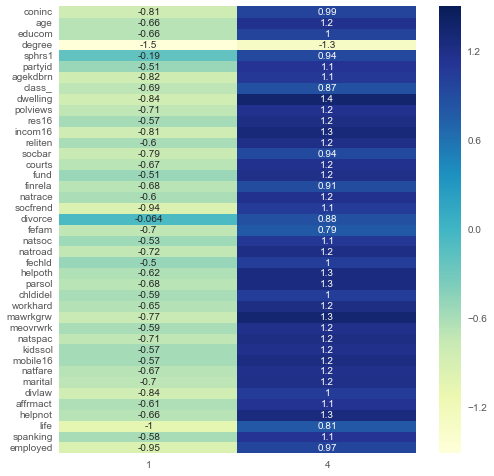

In [7]:

plt.figure(figsize=(8,8))
sns.heatmap(summary.ix[[1,4]].T,cmap="YlGnBu",annot=True)

In [8]:
dif = (summary.ix[4]-summary.ix[1]).values.argsort()[::-1][:5]

In [9]:
summary.columns[dif]

Index([u'dwelling', u'mawrkgrw', u'incom16', u'socfrend', u'natroad'], dtype='object')

## compare cluster 1 and 4

In [23]:
df = pd.read_pickle('data/df_id.pkl')

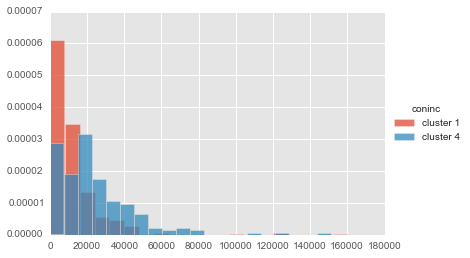

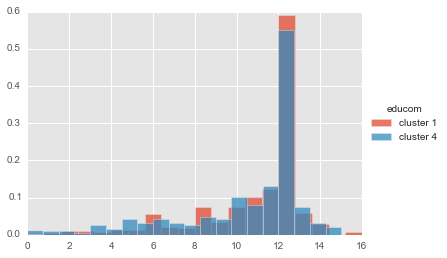

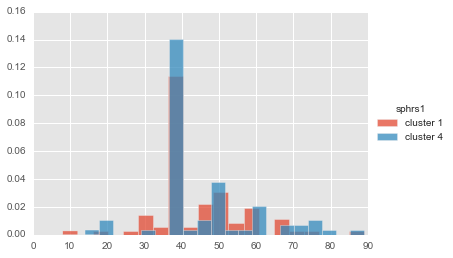

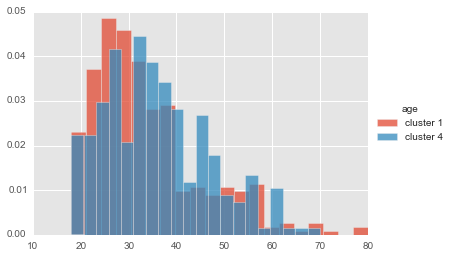

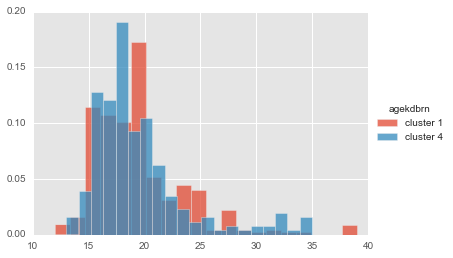

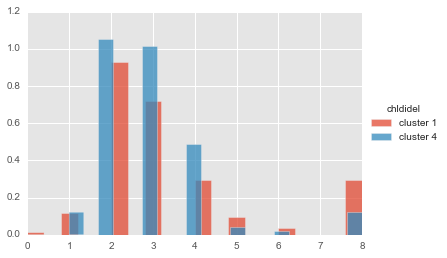

In [27]:
two_all(df,1,4)

Index([u'coninc', u'age', u'educom', u'degree', u'sphrs1', u'partyid',
       u'agekdbrn', u'class_', u'dwelling', u'polviews', u'res16', u'incom16',
       u'reliten', u'socbar', u'courts', u'fund', u'finrela', u'natrace',
       u'socfrend', u'divorce', u'fefam', u'natsoc', u'natroad', u'fechld',
       u'helpoth', u'parsol', u'chldidel', u'workhard', u'mawrkgrw',
       u'meovrwrk', u'natspac', u'kidssol', u'mobile16', u'natfare',
       u'marital', u'divlaw', u'affrmact', u'helpnot', u'life', u'spanking',
       u'employed', u'correct', u'cluster'],
      dtype='object')